In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = sb.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df['per']=df.tip/df.total_bill,

In [5]:
df.drop(['total_bill','tip'],axis=1,inplace=True)

In [6]:
df.head()

,sex,smoker,day,time,size,per
0,Female,No,Sun,Dinner,2,0.059447
1,Male,No,Sun,Dinner,3,0.160542
2,Male,No,Sun,Dinner,3,0.166587
3,Male,No,Sun,Dinner,2,0.139780
4,Female,No,Sun,Dinner,4,0.146808


In [7]:
df = pd.get_dummies(df)

In [8]:
df.head()

,size,per,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,2,0.059447,0,1,0,1,0,0,0,1,0,1
1,3,0.160542,1,0,0,1,0,0,0,1,0,1
2,3,0.166587,1,0,0,1,0,0,0,1,0,1
3,2,0.139780,1,0,0,1,0,0,0,1,0,1
4,4,0.146808,0,1,0,1,0,0,0,1,0,1


In [9]:
import sklearn.linear_model as sl
import sklearn.ensemble as se

In [10]:
X = df.drop('per',axis=1)

In [11]:
y = df.per

In [12]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [20]:
model = se.RandomForestRegressor()

In [31]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
model.score(X_test,y_test)

0.7407407407407407

In [23]:
df['good']= (df.per >=0.12)

In [24]:
df.head()

,size,per,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,good
0,2,0.059447,0,1,0,1,0,0,0,1,0,1,False
1,3,0.160542,1,0,0,1,0,0,0,1,0,1,True
2,3,0.166587,1,0,0,1,0,0,0,1,0,1,True
3,2,0.139780,1,0,0,1,0,0,0,1,0,1,True
4,4,0.146808,0,1,0,1,0,0,0,1,0,1,True


In [25]:
X = df.drop(['per','good'],axis=1)

In [26]:
y = df.good

In [27]:
model = se.RandomForestClassifier()

In [29]:
X.head()

,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,2,0,1,0,1,0,0,0,1,0,1
1,3,1,0,0,1,0,0,0,1,0,1
2,3,1,0,0,1,0,0,0,1,0,1
3,2,1,0,0,1,0,0,0,1,0,1
4,4,0,1,0,1,0,0,0,1,0,1


In [33]:
import sklearn.metrics as mt

In [34]:
y_pred = model.predict(X_test)

In [35]:
mt.confusion_matrix(y_test,y_pred)

array([[ 3, 15],
       [ 6, 57]])

In [37]:
1-21/81

0.7407407407407407

# scipy

In [40]:
df = pd.read_csv('./pandas/pupils.csv')

In [42]:
df.Age.values

array([ 6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14])

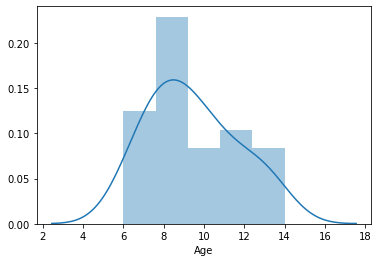

In [43]:
sb.distplot(df.Age)

In [44]:
import scipy.stats as st

In [45]:
fn = st.gaussian_kde(df.Age.values)

In [48]:
fn(5)

array([0.02760915])

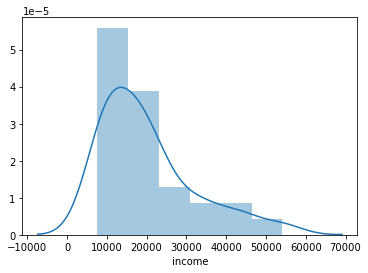

In [49]:
sb.distplot(df.income)

In [50]:
fn = st.gaussian_kde(df.income.values)

In [52]:
fn(12000)

array([3.62128102e-05])

In [53]:
import scipy.integrate as si

In [54]:
si.quad(fn ,12000, 20000)

(0.28557699393716895, 3.170541539722837e-15)